# Framingham Heart Study Analysis (Additional Personal Analysis)

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

## 1) Import and split the data

In [5]:
data=pd.read_csv("/Users/howardyan/Desktop/Classes Spring 2021/IEOR 142 HW/IEOR 142 HW 2/framingham_train.csv")
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,47,Some high school,1,40,0,0,0,0,221,144.0,91.0,35.78,85,66,0
1,1,48,High school/GED,1,17,0,0,0,0,218,113.0,79.0,27.33,62,73,0
2,0,59,Some high school,0,0,0,0,1,0,254,181.0,101.0,24.67,76,68,0
3,1,37,College,0,0,0,0,1,0,195,141.0,84.0,25.66,83,117,0
4,1,39,Some high school,1,40,0,0,0,0,251,115.0,77.0,24.01,65,98,0
5,1,36,High school/GED,0,0,0,0,0,0,186,121.0,79.5,27.08,56,65,0
6,0,43,College,1,20,0,0,0,0,265,107.0,68.0,21.08,90,95,0
7,0,52,Some high school,0,0,0,0,0,0,223,132.0,82.0,26.06,75,63,0
8,0,67,High school/GED,1,20,0,0,1,0,239,154.0,90.0,28.56,72,90,1
9,0,65,Some high school,0,0,0,0,0,0,246,119.0,76.0,19.83,75,156,0


In [107]:
data_train, data_test = train_test_split(data, test_size=0.3, random_state=88)
data_train.shape, data_test.shape

((1792, 16), (768, 16))

## 2) Understand column labels and visualize the data with a pairplot to view relationships between variables 

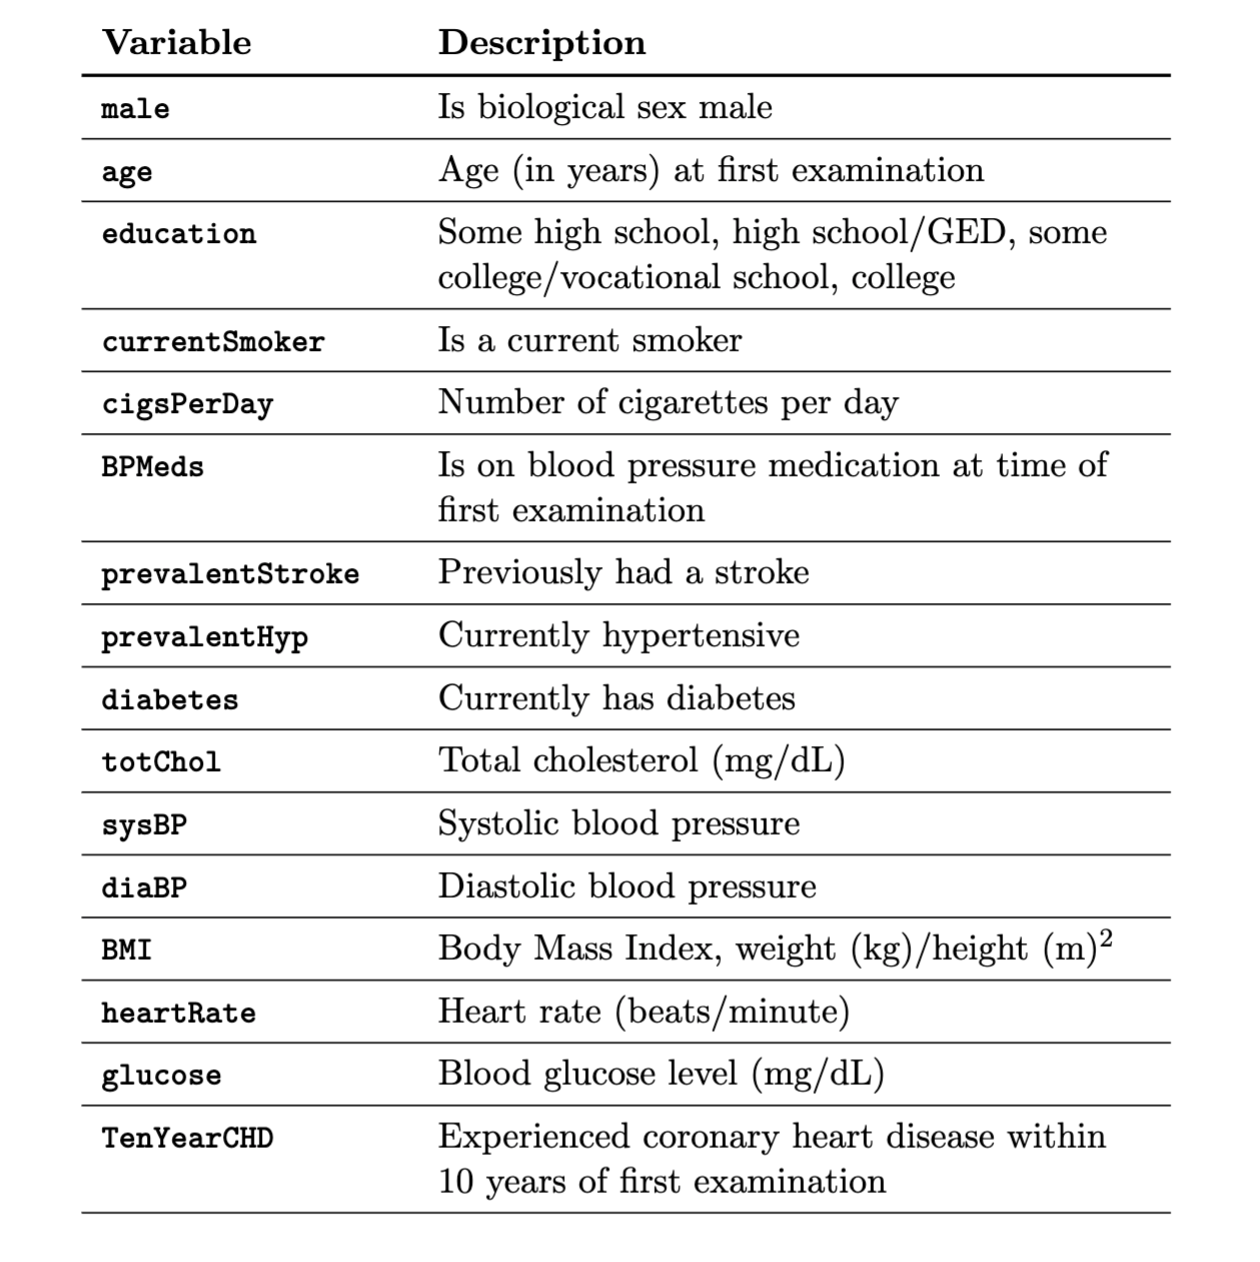

In [19]:
from IPython.display import Image
Image("/Users/howardyan/Desktop/Classes Spring 2021/IEOR 142 HW/IEOR 142 HW 2/Screen Shot 2021-03-04 at 10.36.02 AM.png", width=500)

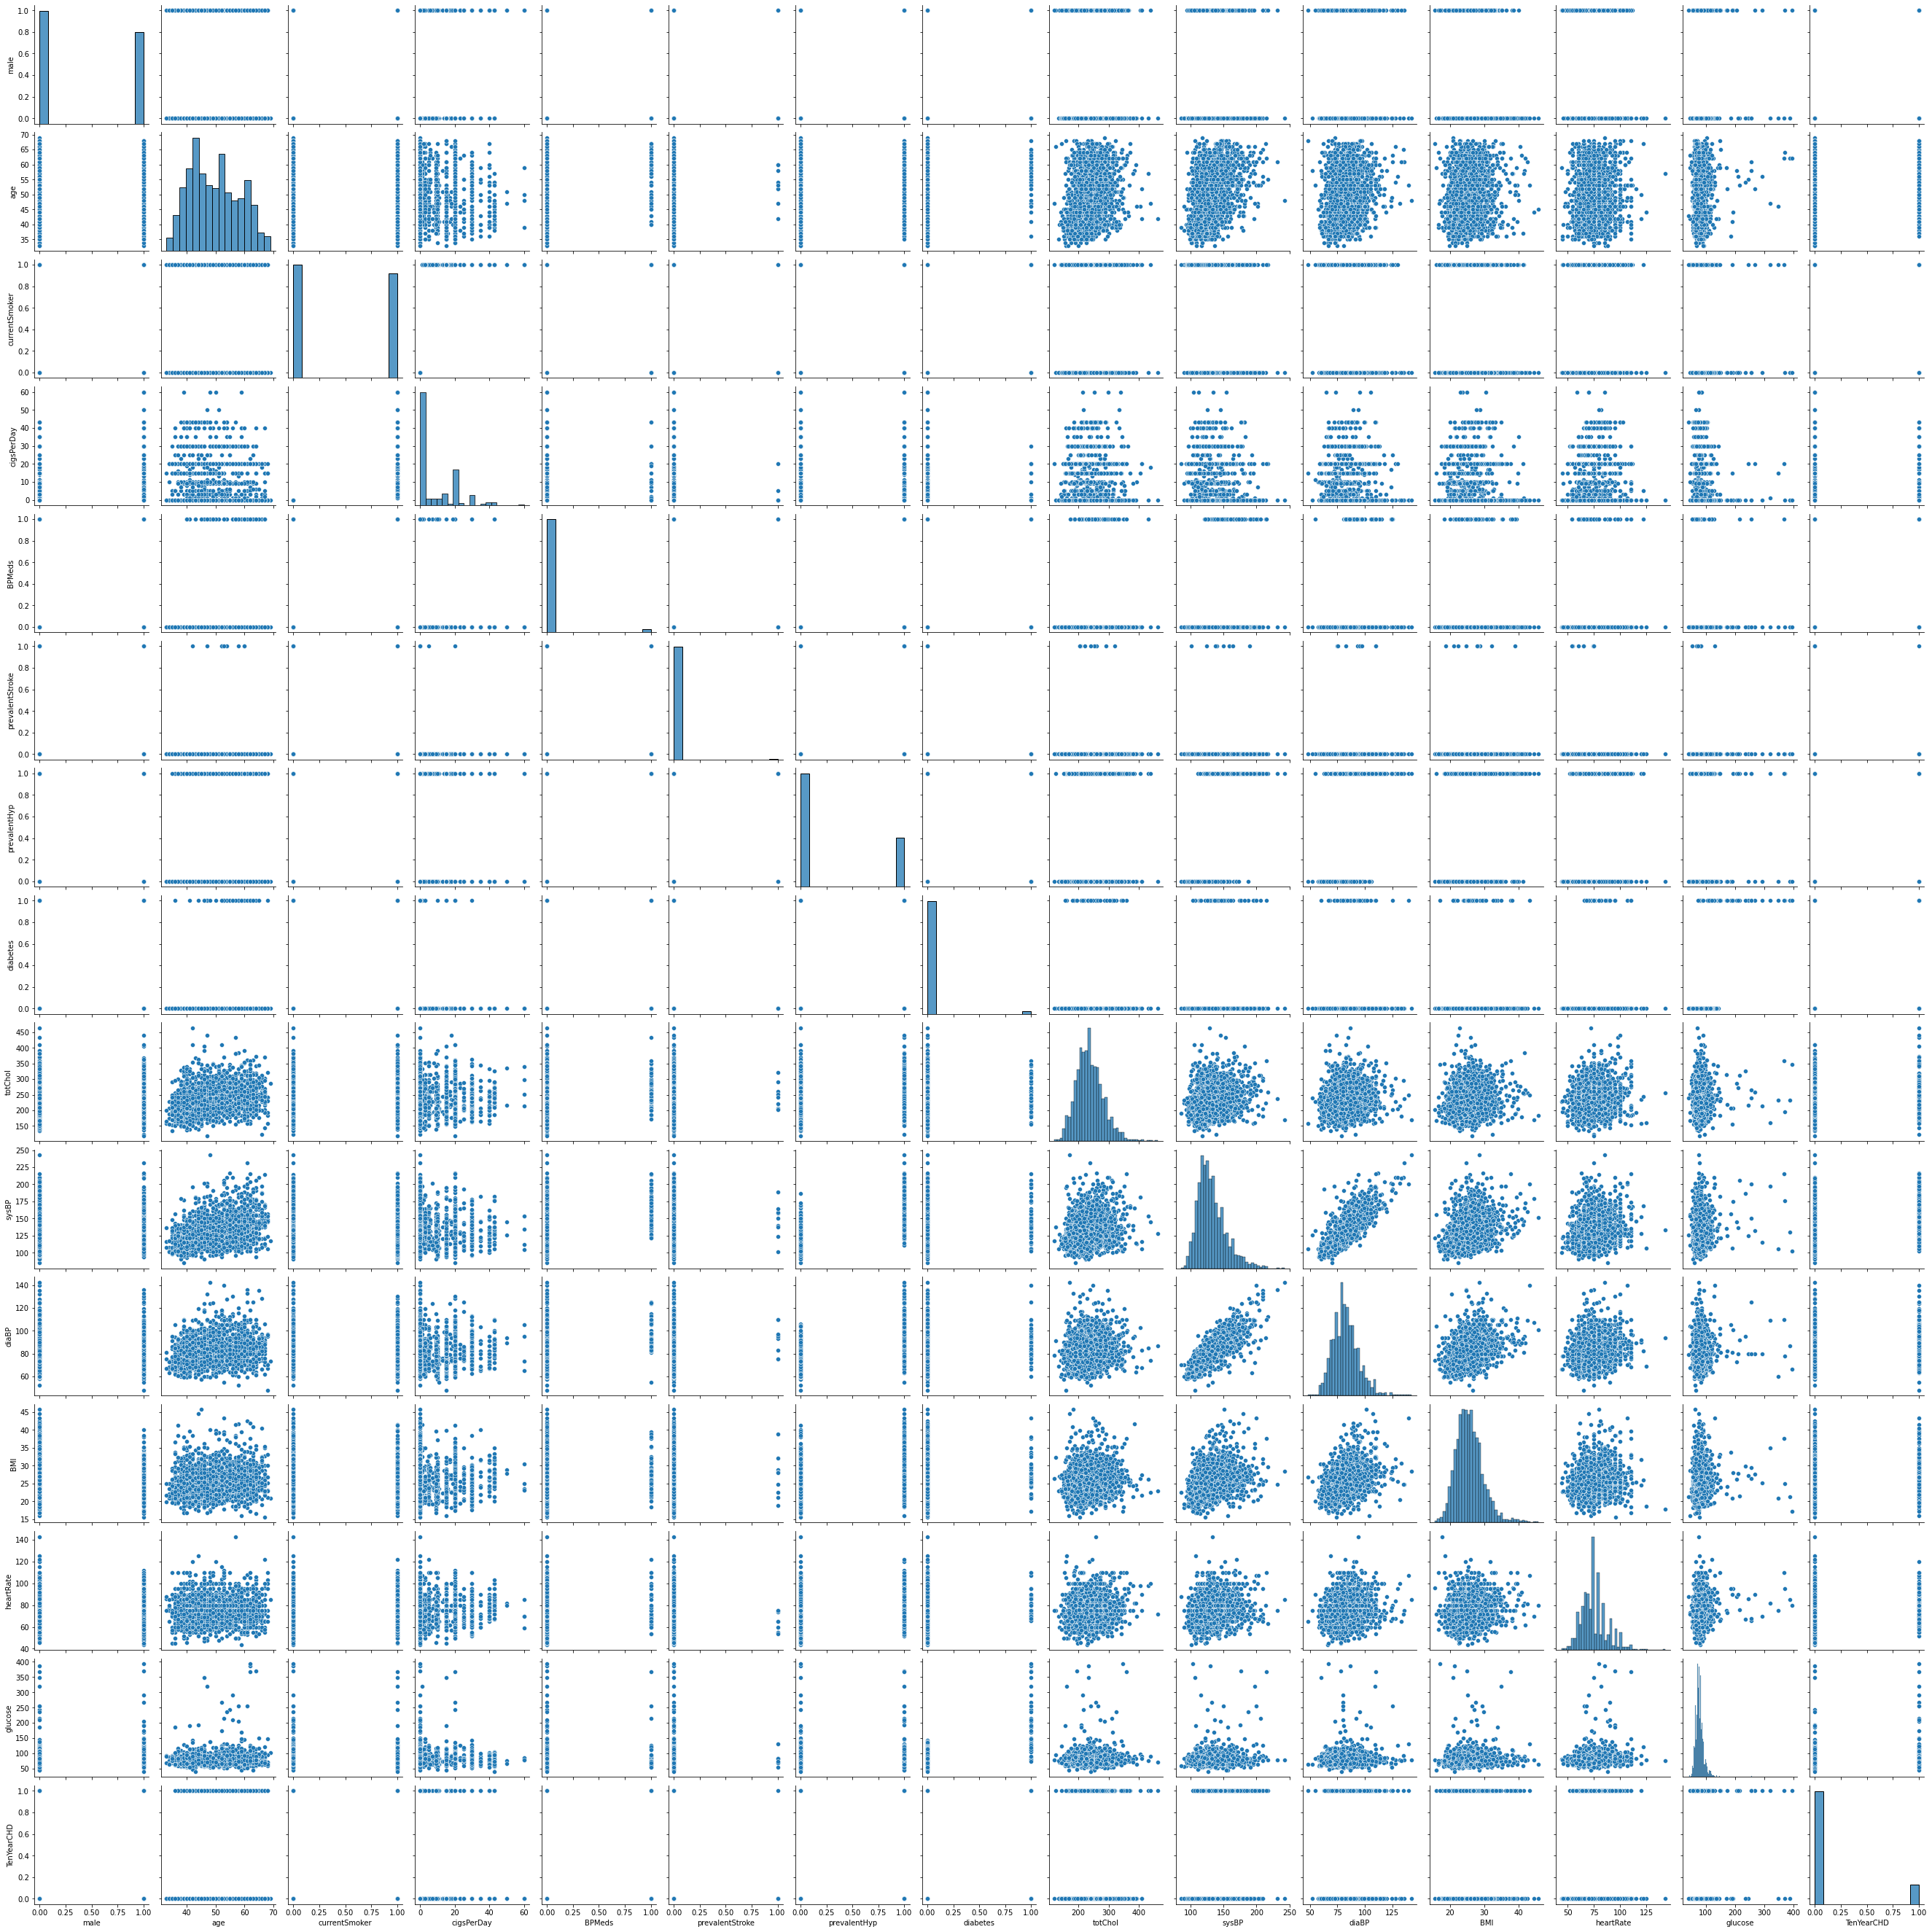

In [109]:
sns.pairplot(data_train);

## 3) Obtain some statistics on our data 
Here, we see that the average age for participants is around 49 years old. We also observe that participants on average smoke 8.79 cigarettes a day, a surprisingly high amount. Furthermore, the median total cholesterol level is slightly elevated (237 milligrams per deciliter) compared to an established benchmark of around 
200 milligrams per deciliter.

In [111]:
description=data_train.describe()
description

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,0.448103,49.594866,0.479911,8.758929,0.027344,0.005022,0.301897,0.022321,237.386161,131.755580,82.731306,25.749710,75.586496,81.683594,0.146205
std,0.497438,8.469272,0.499736,11.649877,0.163129,0.070710,0.459209,0.147768,44.691828,21.359306,11.927086,3.973214,12.002619,24.750701,0.353411
min,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,85.000000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.000000,23.030000,67.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,81.500000,25.390000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.000000,89.500000,27.982500,82.000000,86.000000,0.000000
max,1.000000,69.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,464.000000,243.000000,142.500000,45.800000,143.000000,394.000000,1.000000


## 4) Now, we fit a logistic model onto our dataset

In [38]:
import statsmodels.formula.api as smf

In [112]:
data_train.head(4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1808,1,57,College,0,0,0,0,1,0,310,147.5,90.0,32.09,67,73,1
2555,0,49,High school/GED,0,0,0,0,1,0,221,136.0,90.0,28.30,100,80,0
1515,0,47,Some high school,0,0,0,0,0,0,230,123.0,71.0,26.98,83,73,0
2163,1,51,Some college/vocational school,0,0,0,0,0,0,218,115.0,75.0,25.62,82,62,0


In [116]:
log=smf.logit("TenYearCHD~glucose+heartRate+BMI+diaBP+sysBP+totChol+diabetes+prevalentHyp+prevalentStroke+BPMeds+cigsPerDay+currentSmoker+education+age+male",data=data)

In [117]:
print(log.fit().summary())

Optimization terminated successfully.
         Current function value: 0.378126
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Thu, 04 Mar 2021   Pseudo R-squ.:                  0.1139
Time:                        11:19:45   Log-Likelihood:                -968.00
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 3.382e-43
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

## 5) We notice the p-values for some coefficients are unusually high. Therefore, we start by removing categorical variables with high p values from our dataset.

Specifically, we look at the three levels of education present. Current Smoker, prevalentStroke, and BPMeds.

In [118]:
data2=data_train.copy()

In [ ]:
## We removed the three levels of education that had high p values.

In [119]:
data2['College'] = (data2['education'] == 'College').astype('int64')
data2.drop(columns=['education'], inplace=True)

In [120]:
data2

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,College
1808,1,57,0,0,0,0,1,0,310,147.5,90.0,32.09,67,73,1,1
2555,0,49,0,0,0,0,1,0,221,136.0,90.0,28.30,100,80,0,0
1515,0,47,0,0,0,0,0,0,230,123.0,71.0,26.98,83,73,0,0
2163,1,51,0,0,0,0,0,0,218,115.0,75.0,25.62,82,62,0,0
1066,0,52,0,0,0,0,0,0,265,137.5,84.5,26.91,72,86,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,0,42,1,30,0,0,0,0,240,127.0,90.0,38.54,75,69,0,0
362,1,45,0,0,0,0,1,0,218,133.0,87.0,31.90,88,115,0,0
2481,0,49,0,0,0,0,1,0,168,165.0,99.0,27.10,73,86,0,1
2336,1,41,1,40,0,0,0,0,260,137.5,80.0,26.89,75,55,1,0


## 6) Build another logistic regression model

In [127]:
log2=smf.logit("TenYearCHD~glucose+heartRate+BMI+diaBP+sysBP+totChol+diabetes+prevalentHyp+cigsPerDay+College+age+male",data=data2)

In [128]:
print(log2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.369648
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1779
Method:                           MLE   Df Model:                           12
Date:                Thu, 04 Mar 2021   Pseudo R-squ.:                  0.1116
Time:                        18:05:39   Log-Likelihood:                -662.41
converged:                       True   LL-Null:                       -745.60
Covariance Type:            nonrobust   LLR p-value:                 2.625e-29
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.1366      1.006     -8.086      0.000     -10.109      -6.164
glucose          0.0052

## 7) Now, remove quantitative variables with high p values >0.05
We can remove BMI, heartRate, diaBP, totChol, diabetes, prevalentHyp, and College.

In [131]:
log3=smf.logit("TenYearCHD~glucose+sysBP+cigsPerDay+age+male",data=data2).fit()

Optimization terminated successfully.
         Current function value: 0.373386
         Iterations 7


In [132]:
print(log3.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1786
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Mar 2021   Pseudo R-squ.:                  0.1026
Time:                        18:05:59   Log-Likelihood:                -669.11
converged:                       True   LL-Null:                       -745.60
Covariance Type:            nonrobust   LLR p-value:                 3.101e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2913      0.606    -13.683      0.000      -9.479      -7.104
glucose        0.0083      0.002      3.579      0.000       0.004       0.013
sysBP          0.0185      0.003      5.825      0.0

## 8) Clean up the test set and use log3 to make predictions

In [137]:
data_test_2=data_test.copy()

In [138]:
data_test_2['College'] = (data_test['education'] == 'College').astype('int64')
data_test_2.drop(columns=['education'], inplace=True)

In [142]:
data_test_2[["TenYearCHD","glucose","sysBP","cigsPerDay","age","male"]]

,TenYearCHD,glucose,sysBP,cigsPerDay,age,male
198,0,70,170.0,0,59,1
611,0,95,136.5,0,54,1
1169,0,103,194.0,0,61,0
2366,0,63,113.0,20,48,0
2538,1,73,98.0,1,36,0
...,...,...,...,...,...,...
858,0,67,122.0,19,60,1
1352,0,68,105.0,10,44,1
1383,0,85,121.0,0,48,1
2437,0,65,111.0,20,45,0


In [155]:
y_prob=log3.predict(data_test_2)
y_prob

198     0.342507
611     0.207313
1169    0.382274
2366    0.062944
2538    0.020450
          ...   
858     0.231642
1352    0.073377
1383    0.114852
2437    0.052826
1349    0.079379
Length: 768, dtype: float64

In [149]:
## Since we don't have further analysis, we try to estimate an appropriate threshold by taking the average of the probabilities given by our logistic model

In [150]:
threshold=np.mean(log3.predict(data_test_2))
threshold

0.14973009575163984

In [151]:
## Now we generate an array of predictions (0 if prob below 0.149, 1 if above)

In [158]:
y_pred = pd.Series([1 if x > threshold else 0 for x in y_prob], index=y_prob.index)
y_pred

198     1
611     1
1169    1
2366    0
2538    0
       ..
858     1
1352    0
1383    0
2437    0
1349    0
Length: 768, dtype: int64

## 9) And now we build a confusion matrix to see how our model performed!

In [161]:
from sklearn.metrics import confusion_matrix
y_test = data_test_2['TenYearCHD']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[450 190]
 [ 33  95]]


From this confusion matrix, we see the true positive rate (TPR) is equal to 95/(95+35)=0.73. We also observe the false negative rate (FPR) is equal to 35/130 = 0.269. Furthermore, the true negative rate (TNR) is equal to 0.703. This indicates our model is relatively accurate. The accuracy rate is around 71%.

## 10) Now, compare with a baseline model where all people are assumed not to have heart disease

In [168]:
base=data_test_2.copy()
len(base[['TenYearCHD']])

768

In [170]:
baseline=np.zeros(768)

In [172]:
cm = confusion_matrix(y_test, baseline)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[640   0]
 [128   0]]


This confusion matrix shows us the TNR is 100% and the FNR is 100%. The accuracy rate is around 83%, though there are ethical concerns around the FNR rate. 

## 11) Finally, plot the ROC curve to see model performance. The closer the curve is to the upper left corner, the better!

In [177]:
y_train = data2['TenYearCHD']
X_train = data2.drop(['TenYearCHD'], axis=1)

y_test = data_test_2['TenYearCHD']
X_test = data_test_2.drop(['TenYearCHD'], axis=1)

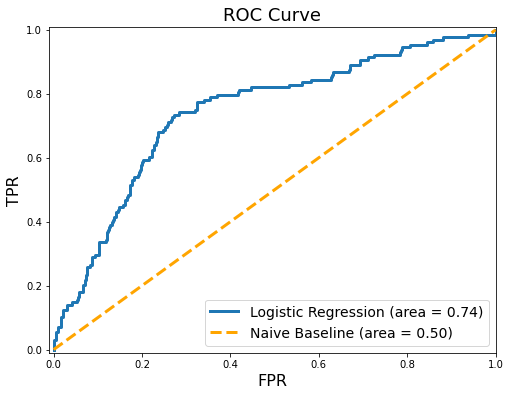

In [181]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='orange', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

We observe the ROC curve flattens between FPR =0.4 and 0.6, indicating a higher tradeoff for each additional unit of TPR. The Area Under Curve (AUC) is around 0.74, meaning it has a 74% chance of accurately classifying if a person is at risk for TenYearCHD.